In [170]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import matplotlib.pyplot as plt



In [171]:
feature_data = pd.read_csv("relevant_features_single_tags.csv")

In [172]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 7,
}

In [173]:
intertia = []
silhouette_coef = []

for k in range(1, 11):
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(feature_data)
    intertia.append(kmeans.inertia_)

    if (k != 1):
        silhouette_coef.append(silhouette_score(feature_data, kmeans.labels_))

1
2
3
4
5
6
7
8
9
10


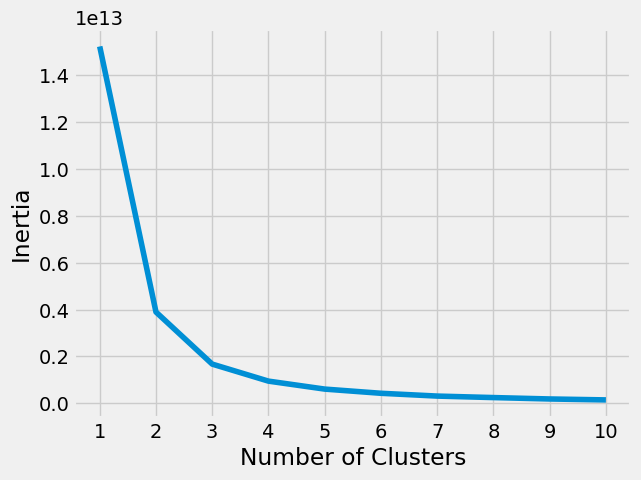

In [174]:
plt.plot(range(1, 11), intertia)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [175]:
kl = KneeLocator(
    range(1, 11), intertia, curve="convex", direction="decreasing"
)

print(kl.elbow)

3


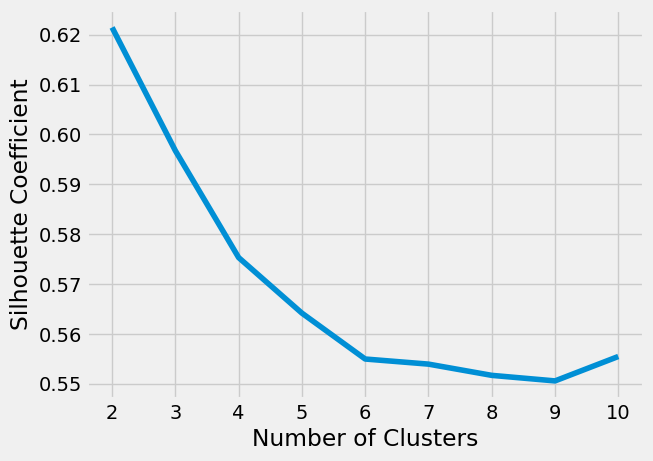

In [176]:
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [177]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(feature_data)

kmeans_3_centers = {
    "centers": kmeans.cluster_centers_,
    "labels": kmeans.labels_,
    "intertia": kmeans.inertia_,
    "iterations": kmeans.n_iter_,
    "features": kmeans.n_features_in_,
    "feature names": kmeans.feature_names_in_
}

In [178]:
def parse_tags(tag):
    tag = tag.strip("[")
    tag = tag.strip("]")
    labels = []
    if ", " in tag: 
        for label in tag.split(", "):
            labels.append(label.strip("'"))
    else:
        labels = [tag.strip("'")]
    return labels

In [179]:
labeled_data = pd.read_csv("single_tags.csv")


print(parse_tags(labeled_data._get_value(12, "seeds")))

['aggressive']


In [180]:
tags_represented = {
    0: {},
    1: {},
    2: {},
}

for i in np.unique(kmeans_3_centers["labels"]):
    indices = np.where(kmeans_3_centers["labels"] == i)[0]
    for index in indices:
        for label in parse_tags(labeled_data._get_value(index, "seeds")):
            if  label not in tags_represented[i].keys():
                tags_represented[i].update({label: 1})
            else:
                tags_represented[i][label] += 1

print(tags_represented)

{0: {'aggressive': 609, 'angry': 593, 'angst-ridden': 7, 'confrontational': 15, 'defiant': 46, 'demonic': 39, 'explosive': 76, 'fierce': 447, 'harsh': 221, 'hostile': 8, 'hyper': 183, 'intense': 443, 'malevolent': 4, 'manic': 82, 'menacing': 131, 'nihilistic': 14, 'ominous': 183, 'outraged': 1, 'outrageous': 10, 'provocative': 60, 'rebellious': 49, 'reckless': 14, 'savage': 57, 'uncompromising': 7, 'unsettling': 37, 'visceral': 13, 'volatile': 10, 'apocalyptic': 163, 'dark': 463, 'eerie': 461, 'feral': 1, 'fractured': 30, 'gloomy': 513, 'halloween': 334, 'macabre': 70, 'paranoid': 177, 'scary': 341, 'spooky': 440, 'suffocating': 1, 'suspenseful': 8, 'threatening': 2, 'urgent': 96, 'bitter': 346, 'bleak': 115, 'brittle': 14, 'cold': 437, 'grim': 67, 'lonely': 444, 'nocturnal': 263, 'delicate': 303, 'dreamy': 342, 'ethereal': 361, 'gentle': 447, 'intimate': 334, 'introspective': 266, 'languid': 1, 'lazy': 541, 'meditative': 396, 'pastoral': 50, 'relaxed': 472, 'reserved': 1, 'restrained'

In [181]:
cluster_zero = tags_represented[0]

cluster_zero = dict(sorted(cluster_zero.items(), key=lambda item: item[1]))

print(cluster_zero)


{'outraged': 1, 'feral': 1, 'suffocating': 1, 'languid': 1, 'reserved': 1, 'capricious': 1, 'snide': 1, 'threatening': 2, 'restrained': 3, 'malevolent': 4, 'acerbic': 5, 'angst-ridden': 7, 'uncompromising': 7, 'hostile': 8, 'suspenseful': 8, 'outrageous': 10, 'volatile': 10, 'visceral': 13, 'nihilistic': 14, 'reckless': 14, 'brittle': 14, 'sardonic': 14, 'confrontational': 15, 'elaborate': 15, 'satirical': 16, 'brassy': 18, 'ambitious': 24, 'brash': 28, 'fractured': 30, 'wry': 36, 'unsettling': 37, 'demonic': 39, 'devotional': 41, 'defiant': 46, 'rebellious': 49, 'pastoral': 50, 'savage': 57, 'provocative': 60, 'grim': 67, 'macabre': 70, 'explosive': 76, 'manic': 82, 'urgent': 96, 'cathartic': 101, 'enigmatic': 109, 'bleak': 115, 'sparse': 123, 'sarcastic': 128, 'menacing': 131, 'apocalyptic': 163, 'paranoid': 177, 'hyper': 183, 'ominous': 183, 'harsh': 221, 'ironic': 229, 'nocturnal': 263, 'introspective': 266, 'eccentric': 276, 'delicate': 303, 'halloween': 334, 'intimate': 334, 'sca

In [182]:
cluster_one = tags_represented[1]

cluster_one = dict(sorted(cluster_one.items(), key=lambda item: item[1]))

print(cluster_one)

{'springlike': 1, 'athletic': 1, 'consoling': 1, 'translucent': 1, 'sprightly': 2, 'amiable': 2, 'dignified': 2, 'funereal': 3, 'jittery': 3, 'effervescent': 4, 'distraught': 4, 'regretful': 5, 'gutsy': 5, 'swaggering': 5, 'boisterous': 5, 'thuggish': 7, 'meandering': 7, 'celebratory': 7, 'irreverent': 8, 'noble': 8, 'sugary': 9, 'rambunctious': 9, 'good-natured': 9, 'greasy': 10, 'wintry': 10, 'street-smart': 12, 'circular': 12, 'raucous': 12, 'rollicking': 12, 'transparent': 12, 'bravado': 14, 'marching': 14, 'sprawling': 16, 'exuberant': 18, 'plaintive': 19, 'kinetic': 20, 'weary': 21, 'narcotic': 25, 'rowdy': 25, 'reassuring': 25, 'fiery': 26, 'searching': 27, 'mighty': 27, 'child-like': 29, 'perky': 34, 'elegiac': 35, 'graceful': 36, 'anxious': 36, 'thrilling': 46, 'tense': 52, 'airy': 54, 'trashy': 55, 'sparkling': 56, 'druggy': 57, 'confident': 61, 'messy': 65, 'shimmering': 67, 'innocent': 69, 'precious': 71, 'nervous': 71, 'naive': 75, 'laid-back': 84, 'cynical': 90, 'somber':

In [183]:
cluster_two = tags_represented[2]

cluster_two = dict(sorted(cluster_two.items(), key=lambda item: item[1]))

print(cluster_two)

{'jovial': 1, 'feverish': 2, 'ramshackle': 2, 'austere': 2, 'hedonistic': 3, 'reverent': 3, 'resolute': 3, 'gleeful': 4, 'ornate': 5, 'indulgent': 6, 'refined': 8, 'giddy': 9, 'stately': 9, 'understated': 10, 'freewheeling': 11, 'self-conscious': 11, 'animated': 12, 'difficult': 12, 'campy': 15, 'hungry': 19, 'detached': 27, 'clinical': 35, 'mechanical': 50, 'earnest': 55, 'ecstatic': 63, 'comic': 67, 'spicy': 67, 'rustic': 75, 'carefree': 80, 'literate': 80, 'epic': 96, 'joyous': 114, 'cerebral': 119, 'bittersweet': 120, 'philosophical': 130, 'crunchy': 146, 'monumental': 192, 'theatrical': 205, 'stylish': 217, 'complex': 221, 'sophisticated': 227, 'earthy': 249, 'narrative': 259, 'sexual': 269, 'elegant': 279, 'euphoric': 303, 'humorous': 316, 'mystical': 333, 'passionate': 335, 'martial': 362, 'witty': 391, 'serious': 397, 'playful': 403, 'organic': 435, 'silly': 436, 'technical': 449, 'mysterious': 450, 'gritty': 452, 'sensual': 466, 'warm': 496, 'happy': 501, 'fun': 511, 'upliftin

In [184]:
kmeans_3_labeled = pd.read_csv("single_tags.csv")
print(kmeans_3_labeled.shape)
kmeans_3_labeled.insert(len(kmeans_3_labeled.columns), "Labels", kmeans_3_centers["labels"], True)

print(kmeans_3_labeled.shape)

kmeans_3_labeled.to_csv("kmeans_3.csv")

(48390, 23)
(48390, 24)


In [185]:
#Song Sampling

c1_idx = np.where(kmeans_3_centers["labels"] == 0)[0]
c2_idx = np.where(kmeans_3_centers["labels"] == 1)[0]
c3_idx = np.where(kmeans_3_centers["labels"] == 2)[0]

c1_sample = np.random.choice(c1_idx, size=10, replace=False)
c2_sample = np.random.choice(c2_idx, size=10, replace=False)
c3_sample = np.random.choice(c3_idx, size=10, replace=False)

print("Cluster 1")
print(kmeans_3_labeled.loc[c1_sample])
print("Cluster 2")
print(kmeans_3_labeled.loc[c2_sample])
print("Cluster 3")
print(kmeans_3_labeled.loc[c3_sample])



Cluster 1
       Unnamed: 0                                track         artist  \
10145       15348                             Loveable     Glass Pear   
6017         9067                      A Fool Persists  Infinite Body   
12996       19857                               Berlin  Carpark North   
12785       19558           Another One For The Humans          Laura   
14081       21266                    Thought Contagion           Muse   
12145       18106                             Sonata X      John Cage   
11223       16782                       Mit dir chilln   Revolverheld   
213           312             What U See Is What U Get         Xzibit   
1398         2145                   Look at These Hoes      Santigold   
12362       18423  Was in Bad Kleinen wirklich geschah  Wiglaf Droste   

                   seeds              spotify_id  danceability  energy  key  \
10145  ['introspective']  0YvlYPegNeTYWgRbRpE9Gr        0.6370  0.6010    0   
6017          ['spooky']  38